# Telco Customer Churn
* https://www.kaggle.com/datasets/blastchar/telco-customer-churn

In [83]:
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
filepath = os.path.join('C:\DATA\Data_Mining_Course_Materials', 'Telco Customer Churn.csv')

# Data load

In [3]:
df = pd.read_csv(filepath)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
print('Number of rows: {}'.format(len(df)))

df.drop(columns=['customerID'], inplace=True)
print('Columns:', df.columns)

Number of rows: 7043
Columns: Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [5]:
target_variable = 'Churn'
print('Target variable:', target_variable)
print('Unique values of target variable:', sorted(df[target_variable].unique()))

feature_variables = [item for item in df.columns if item != target_variable]
print('\nNumber of feature variables: {}'.format(len(feature_variables)))
print('Feature variable:', feature_variables)

Target variable: Churn
Unique values of target variable: ['No', 'Yes']

Number of feature variables: 19
Feature variable: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


# Exploratory Data Analysis
### Categorical variable vs Numerical variable

In [6]:
for variable_name in feature_variables: 
    unique_values = sorted(df[variable_name].unique())
    if len(unique_values) > 50:
        unique_values = 'Number of unique values exceeds 50!'
    print('{}: {}'.format(variable_name, unique_values))

gender: ['Female', 'Male']
SeniorCitizen: [0, 1]
Partner: ['No', 'Yes']
Dependents: ['No', 'Yes']
tenure: Number of unique values exceeds 50!
PhoneService: ['No', 'Yes']
MultipleLines: ['No', 'No phone service', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'No internet service', 'Yes']
OnlineBackup: ['No', 'No internet service', 'Yes']
DeviceProtection: ['No', 'No internet service', 'Yes']
TechSupport: ['No', 'No internet service', 'Yes']
StreamingTV: ['No', 'No internet service', 'Yes']
StreamingMovies: ['No', 'No internet service', 'Yes']
Contract: ['Month-to-month', 'One year', 'Two year']
PaperlessBilling: ['No', 'Yes']
PaymentMethod: ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']
MonthlyCharges: Number of unique values exceeds 50!
TotalCharges: Number of unique values exceeds 50!


In [7]:
numerical_variables = ['tenure', 'MonthlyCharges', 'TotalCharges']
print('Number of numerical variables: {}'.format(len(numerical_variables)))
print('Numerical variable:', numerical_variables)

categorical_variables = [item for item in feature_variables if item not in numerical_variables]
print('\nNumber of categorical variables: {}'.format(len(categorical_variables)))
print('Categorical variable:', categorical_variables)

Number of numerical variables: 3
Numerical variable: ['tenure', 'MonthlyCharges', 'TotalCharges']

Number of categorical variables: 16
Categorical variable: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


If the value is in string format, convert it to numeric format.

In [8]:
print('Before preprocessing:', df[numerical_variables].iloc[0].values)

for col in numerical_variables:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
print('After preprocessing:', df[numerical_variables].iloc[0].values)

Before preprocessing: [1 29.85 '29.85']
After preprocessing: [ 1.   29.85 29.85]


# Preprocessing
### Missing value imputation

In [9]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* `tenure`: Number of months the customer has stayed with the company
* It is assumed that customers who have a tenure of 0 months (i.e., those who have just joined) have not yet paid any price (i.e., TotalCharges==0).

In [21]:
df[np.isnan(df['TotalCharges'])].index == df[df['tenure']==0].index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

* Thus, we decided to replace the missing values (`NaN`) in `TotalCharges` as with zeros.

In [27]:
df['TotalCharges'].fillna(0, inplace=True)
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### One-hot encoding for categorical variables

Original classes
* `SeniorCitizen`: [0, 1]
* `gender`: ['Female', 'Male']
* `Partner`: ['No', 'Yes']
* `MultipleLines`: ['No', 'No phone service', 'Yes']

In [37]:
df[categorical_variables]

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


Apply one-hot encoding

In [38]:
pd.get_dummies(df[categorical_variables], drop_first=True)

,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,1,1,0,1,0,0,0,...,0,1,0,1,1,0,1,0,0,1
7039,0,0,1,1,1,0,1,1,0,0,...,0,1,0,1,1,0,1,1,0,0
7040,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,1,1,0,1,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


# Train a model
### Features

In [53]:
features_df = df[numerical_variables].join(pd.get_dummies(df[categorical_variables], drop_first=True))
feature_names = features_df.columns
print('Feature names:', feature_names)
features_df

Feature names: Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')


,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,34,56.95,1889.50,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,45,42.30,1840.75,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,2,70.70,151.65,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,1,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,72,103.20,7362.90,0,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,11,29.60,346.45,0,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,4,74.40,306.60,1,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1


In [44]:
X = features_df.values
X.shape

(7043, 30)

### Target variable

In [45]:
target_df = pd.get_dummies(df[target_variable], drop_first=True)
target_df

,Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [96]:
label_dict = {0: 'Not Churn', 1: 'Churn'}
class_names = [label_dict[item] for item in sorted(target_df['Yes'].unique())]
class_names

['Not Churn', 'Churn']

In [97]:
y = target_df.values
print('Before np.reshape:', y.shape)

y = np.reshape(y, (y.shape[0], ))
print('After np.reshape:', y.shape)
y

Before np.reshape: (7043, 1)
After np.reshape: (7043,)


array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

### Draw a decision tree and evaluate the performance of the model
Note that the following results indicate the accuracy and F1-score achieved for the training data.

In [102]:
def create_confusion_matrix(labels, preds, out_filepath=None):
    confmat = pd.crosstab(pd.Series(labels, name="true"), pd.Series(preds, name="prediction"))
    confmat['n_true'] = confmat.sum(axis=1)
    confmat.loc['n_pred'] = confmat.sum(axis=0)
    if out_filepath is not None:
        confmat.to_csv(out_filepath)
        print('Created {}'.format(out_filepath))
    return confmat

Metric: `entropy` & max_depth: 3 (This is the **best**, in terms of high f1-score and minimal max_depth, among the models presented in this file.)
* Macro f1-score: 0.71

How to interpret the figure:
* Left: True for the question of the parent node; Right: False for the question of the parent node. 
* `Contract_Two year = 0` means the value for the "Contract" feature is not "Two year."
* `InternetService_Fiber optic = 1` means the value for the "InternetService" feature is "Fiber optic."
* (`Contract_Two year = 0`) & (`Contract_One year = 0`) & (`InternetService_Fiber optic = 1`)
    - The number of rows satisfying these conditions is 2,128.
        - `Not churn`: 966 samples
        - `Churn`: 1,162 samples

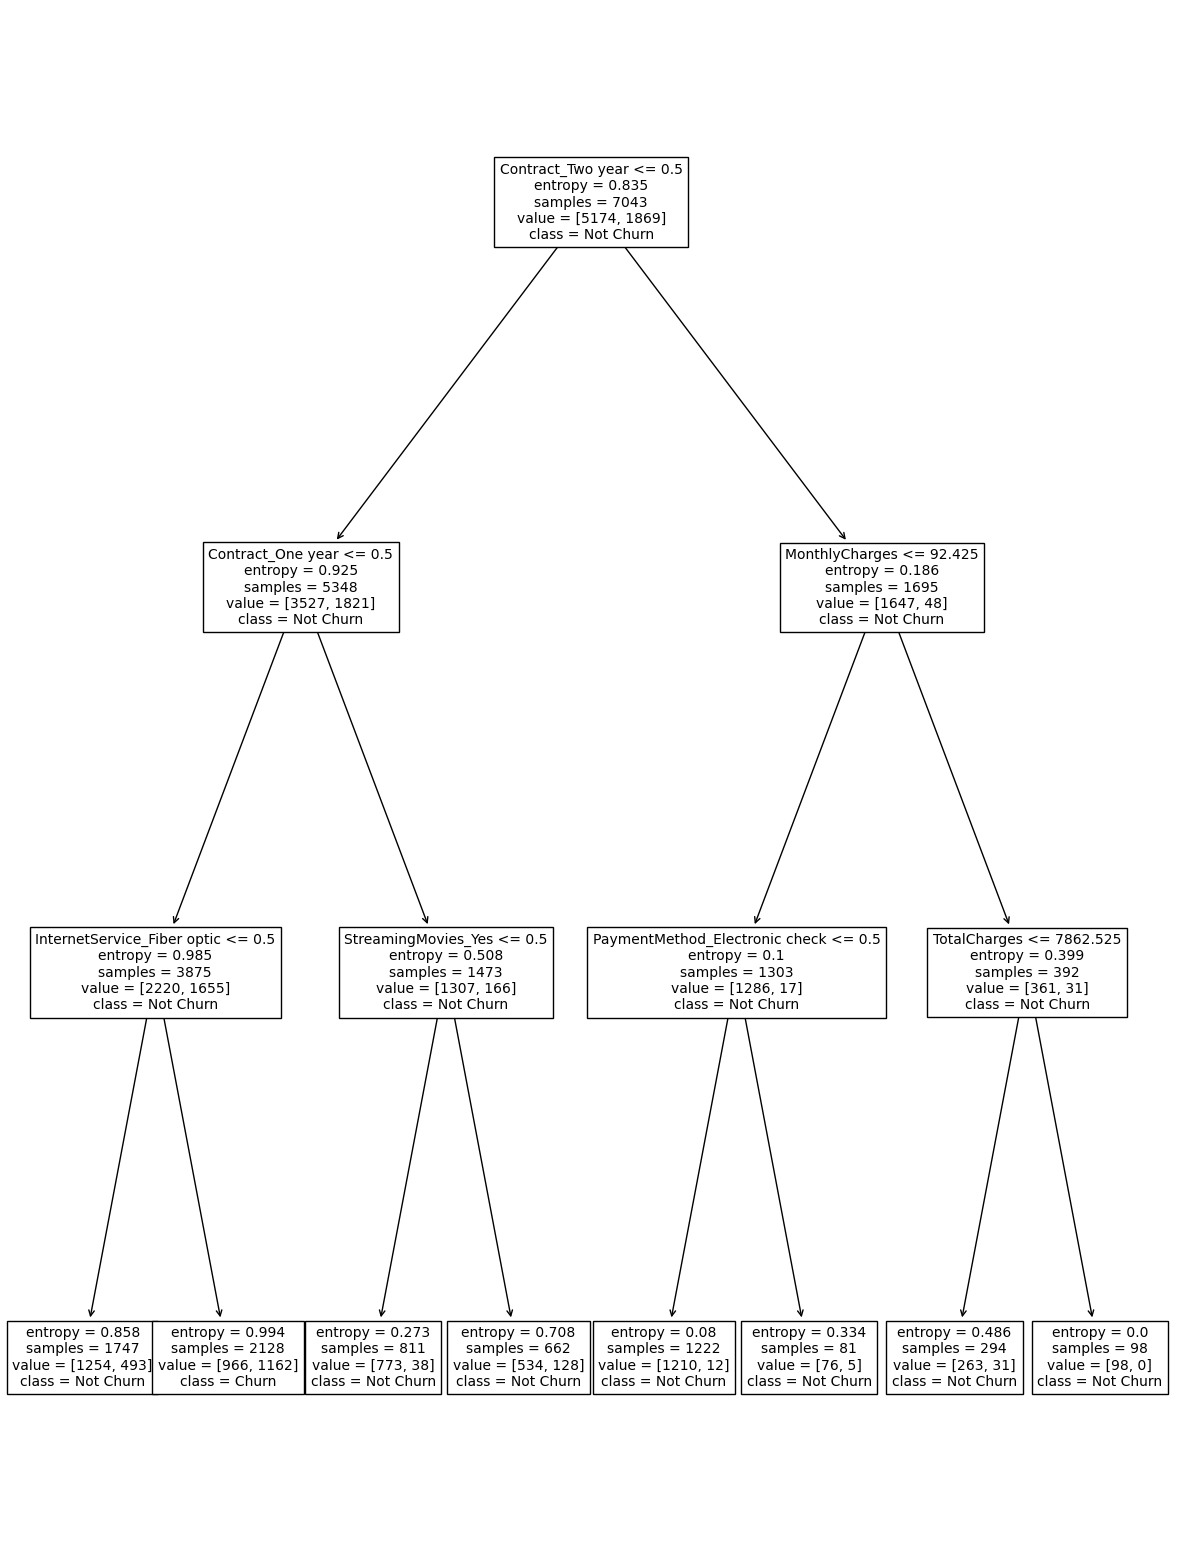

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      5174
           1       0.55      0.62      0.58      1869

    accuracy                           0.76      7043
   macro avg       0.70      0.72      0.71      7043
weighted avg       0.77      0.76      0.77      7043



prediction,0,1,n_true
true,,,
0,4208,966,5174
1,707,1162,1869
n_pred,4915,2128,7043


In [103]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, min_samples_leaf = 20)
clf = clf.fit(X, y)

# plot tree
plt.figure(figsize=(15,20)) 
tree.plot_tree(clf, feature_names=feature_names, fontsize=10, class_names=class_names)
plt.show()

print(classification_report(y, clf.predict(X)))
create_confusion_matrix(y, clf.predict(X))

Metric: `entropy` & max_depth: 4
* Macro f1-score: 0.68

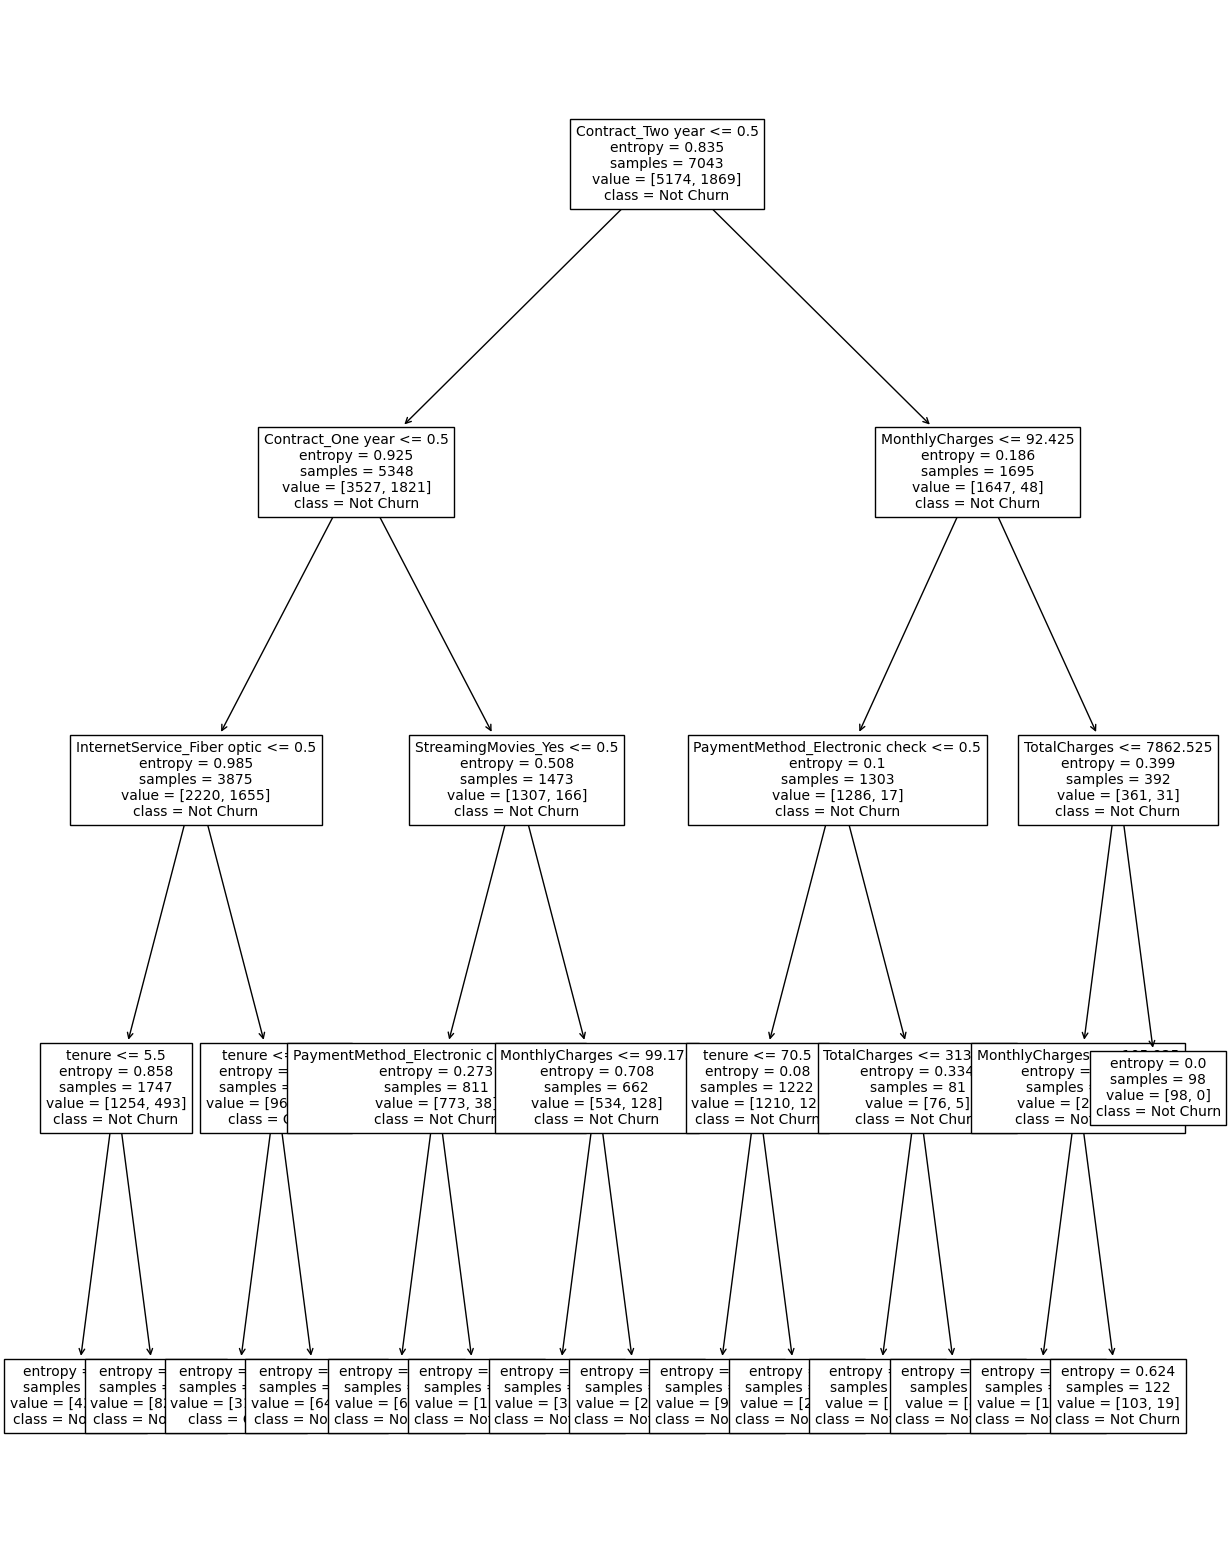

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      5174
           1       0.69      0.38      0.49      1869

    accuracy                           0.79      7043
   macro avg       0.75      0.66      0.68      7043
weighted avg       0.78      0.79      0.77      7043



prediction,0,1,n_true
true,,,
0,4855,319,5174
1,1152,717,1869
n_pred,6007,1036,7043


In [111]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 20)
clf = clf.fit(X, y)

# plot tree
plt.figure(figsize=(15,20)) 
tree.plot_tree(clf, feature_names=feature_names, fontsize=10, class_names=class_names)
plt.show()

print(classification_report(y, clf.predict(X)))
create_confusion_matrix(y, clf.predict(X))

Metric: `gini` & max_depth: 3
* Macro f1-score: 0.68

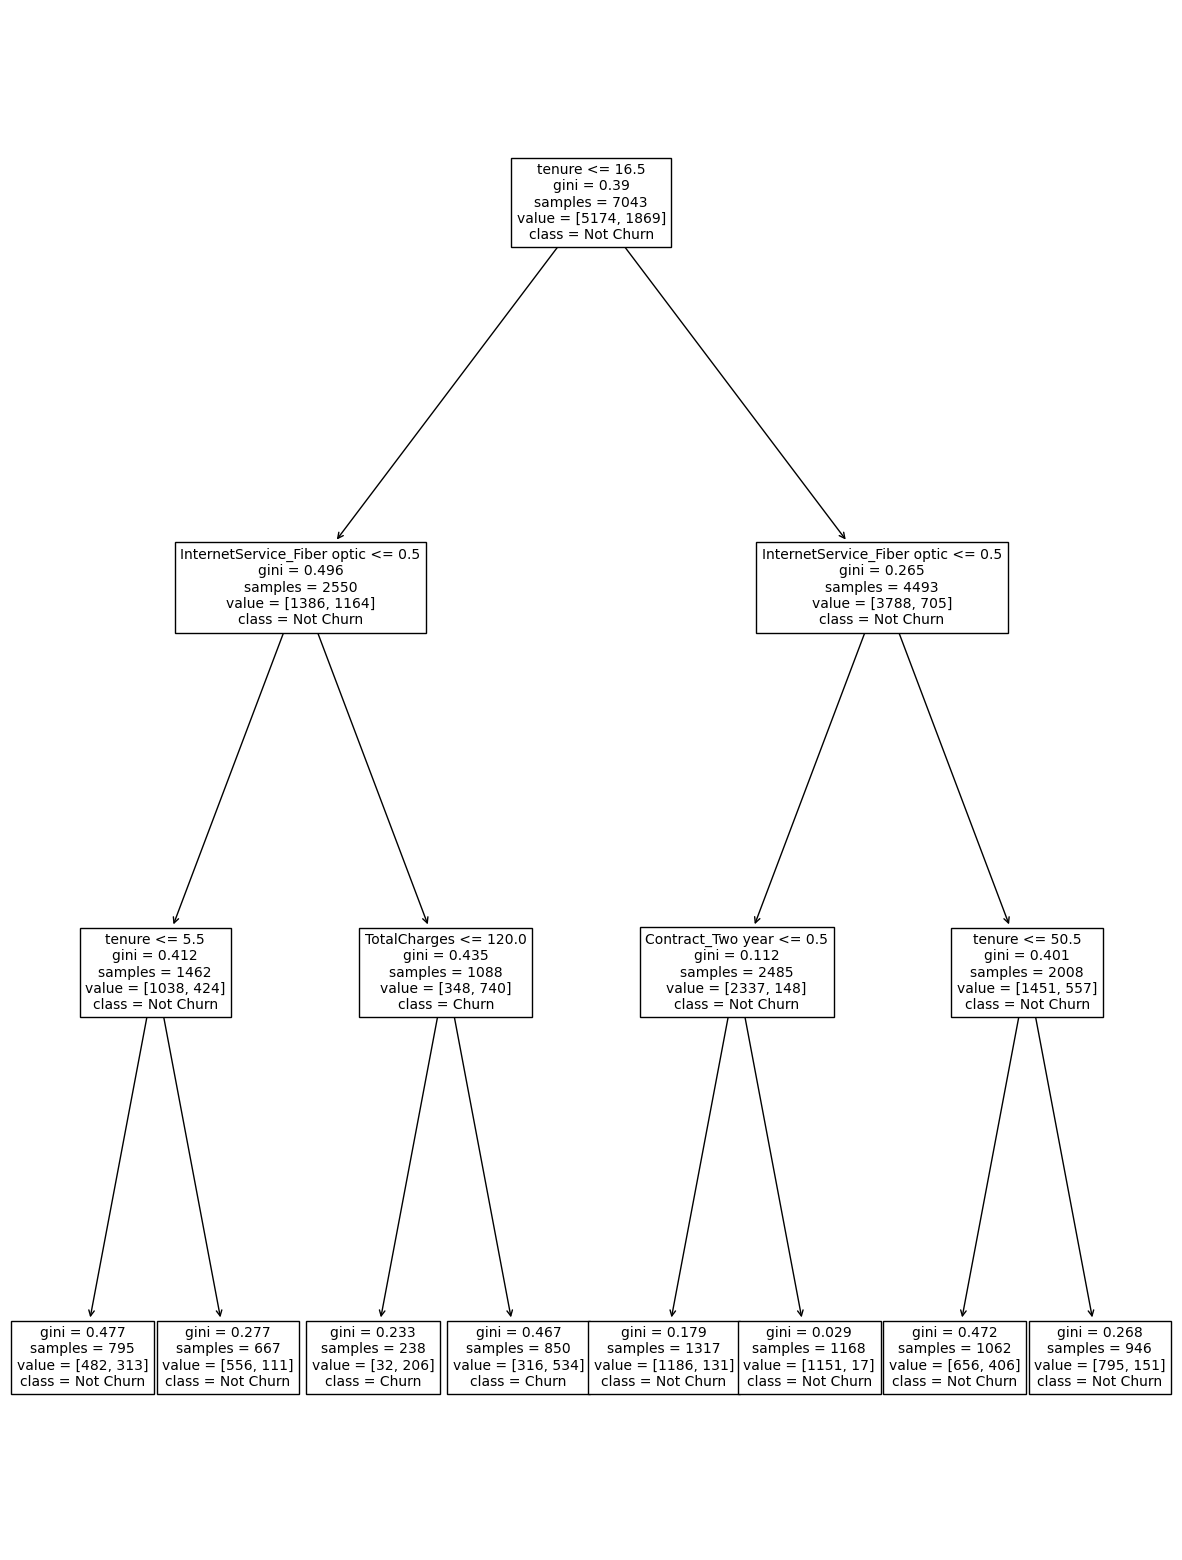

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      5174
           1       0.68      0.40      0.50      1869

    accuracy                           0.79      7043
   macro avg       0.75      0.66      0.68      7043
weighted avg       0.78      0.79      0.77      7043



prediction,0,1,n_true
true,,,
0,4826,348,5174
1,1129,740,1869
n_pred,5955,1088,7043


In [108]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 20)
clf = clf.fit(X, y)

# plot tree
plt.figure(figsize=(15,20)) 
tree.plot_tree(clf, feature_names=feature_names, fontsize=10, class_names=class_names)
plt.show()

print(classification_report(y, clf.predict(X)))
create_confusion_matrix(y, clf.predict(X))

Metric: `gini` & max_depth: 2
* Macro f1-score: 0.68

`InternetService`: Customer’s internet service provider (DSL, Fiber optic, No)

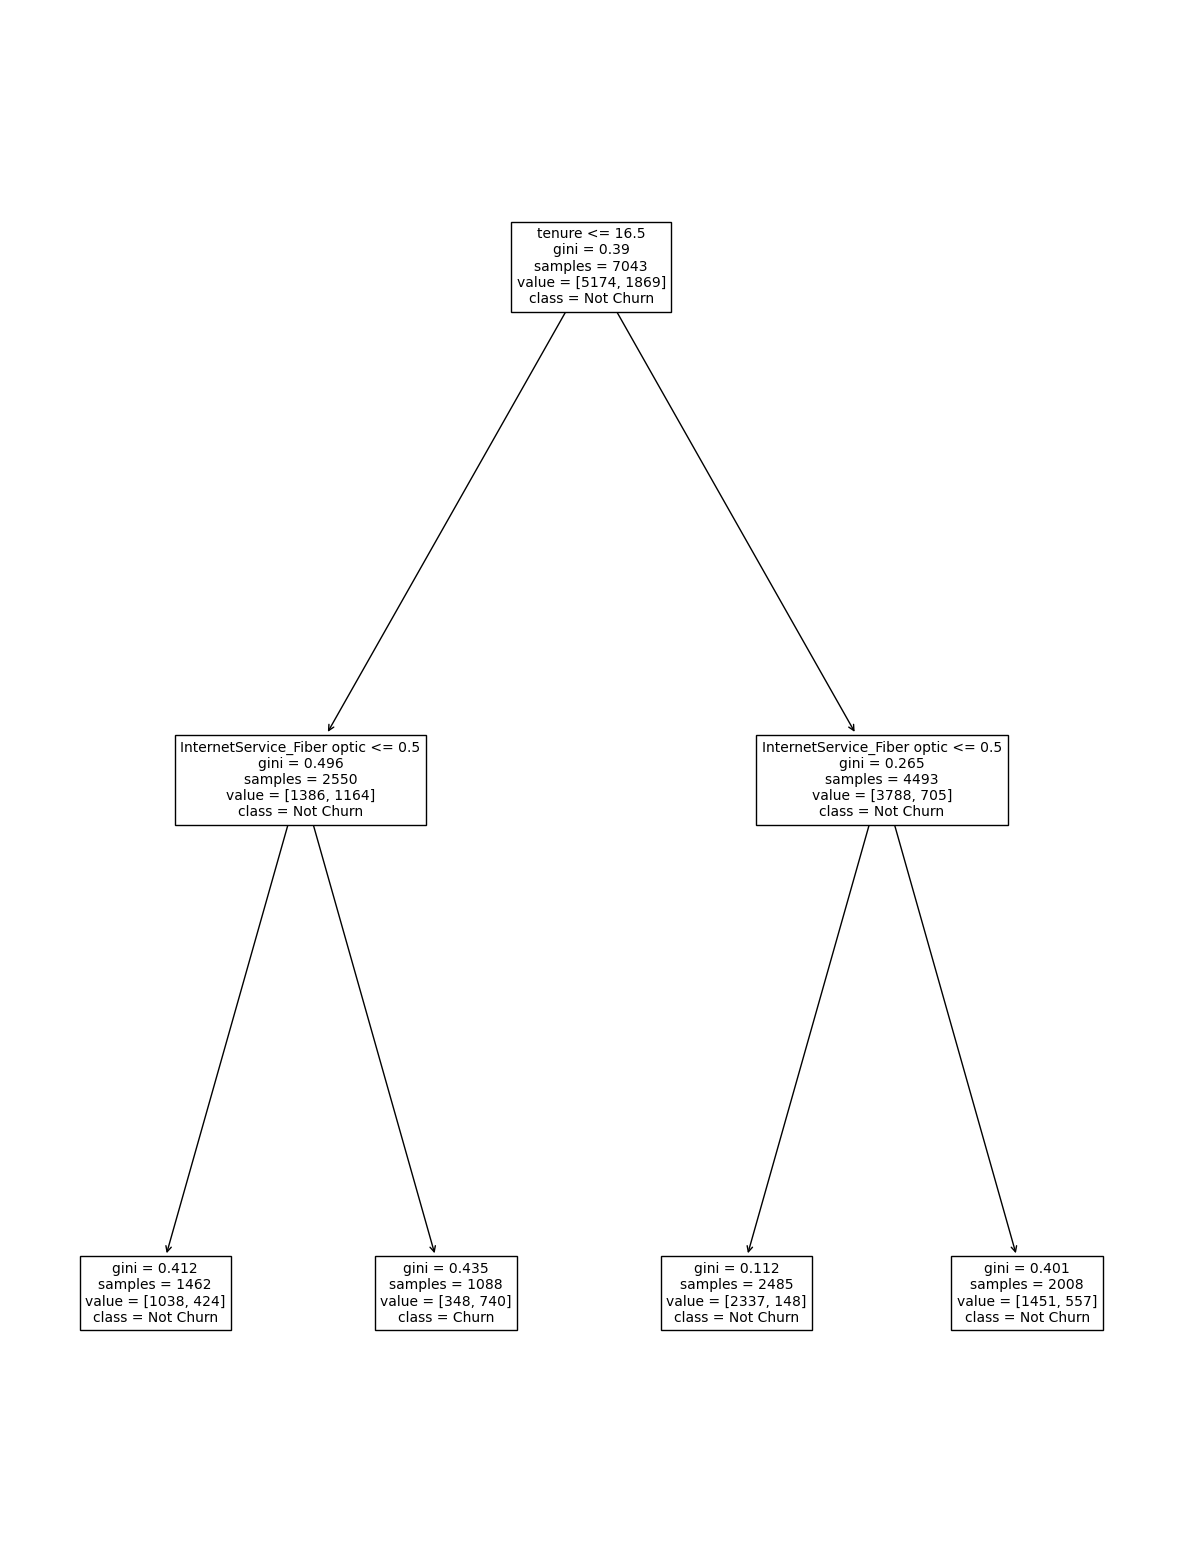

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      5174
           1       0.68      0.40      0.50      1869

    accuracy                           0.79      7043
   macro avg       0.75      0.66      0.68      7043
weighted avg       0.78      0.79      0.77      7043



prediction,0,1,n_true
true,,,
0,4826,348,5174
1,1129,740,1869
n_pred,5955,1088,7043


In [112]:
clf = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = 2, min_samples_leaf = 20)
clf = clf.fit(X, y)

# plot tree
plt.figure(figsize=(15,20)) 
tree.plot_tree(clf, feature_names=feature_names, fontsize=10, class_names=class_names)
plt.show()

print(classification_report(y, clf.predict(X)))
create_confusion_matrix(y, clf.predict(X))